In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm



class model:
    def __init__(self,mean,cov):
        self.mean = mean
        self.cov = cov
        self.theta = 0

class ContextBandit:
    #Bandit Object
    def __init__(self,params,prior_model):
        #initialize everything
        self.pi_min = params[0]
        self.pi_max = params[1]
        self.v = 1e-1 #tuning parameter - multiplier on bandit prior covariances
        
        
        #Initialize model to prior data model
        self.model = model(params[2]*prior_model.mean,np.eye(len(prior_model.mean)) + params[2]*prior_model.cov)
        #self.model.mean = params.prior_weight*prior_model.mean
        
        #self.model.cov = np.eye(model.n) + prior_weight*prior_model.cov
        
    ######
    
    def get_reward_func(self): #Do the regression to estimate reward function
        self.model.theta = np.dot(np.linalg.inv(self.model.cov) , self.model.mean) #Regression estimate
        
        return self.model
    
    #####
    
    def update_model(self, featVec, reward, missing_data_flags, action,prob):
        #Thompson sampling eqns
        
        self.model.mean = self.model.mean + featVec.reshape((-1, 1))*reward * (action - 0*prob)
        self.model.cov = self.model.cov + action*(np.outer(featVec , featVec)) #
        
        

        
        
########
#Utility function to get action probability on user side. Does not affect class or object
def action_probability(featVec,bandit):
    current_model = bandit.get_reward_func()
    
    #Probability of Gaussian scalar exceeding threshold
    mean = np.dot(featVec , current_model.theta)
    variance = bandit.v**2 * np.dot(featVec.transpose() , np.dot(np.linalg.inv(current_model.cov), featVec.reshape((-1, 1))))
    pi_0 = 1-norm.cdf(0, mean, np.sqrt(variance))
    #print current_model.theta.shape
    if pi_0 < bandit.pi_min:
        alpha = bandit.pi_min
    elif pi_0 > bandit.pi_max:
        alpha = bandit.pi_max
    else: 
        alpha = pi_0
        
    return alpha #probability of taking action 1

#######


In [2]:
#Create a reward function
def reward(featVec,action,coef0,coef1,sig):
    
    
    #linear funcs here
    if action == 0:
        rwd = np.dot(coef0 , featVec) + sig*np.random.normal()
    else:
        rwd = np.dot(coef1 , featVec) + sig*np.random.normal()
    return rwd





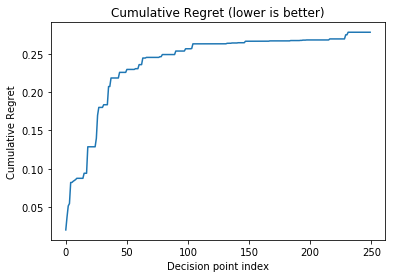

In [3]:
n = 3 #dimension (numer of features)
T = 50 #days of study
t = 5 #decision points per day

coef0 = 0*np.random.normal(0,1,n) #Reward with no action - zero for now
coef1 = coef0 + .2*np.random.normal(0,1,n) #Reward with action - we randomly generate a coefficient vector, can insert any coefficient vector you may want to test 


sig = 1e-1 #Reward noise standard deviation (zero mean Gaussian noise)

#Create a bandit object
params = [.2, .8, 0]#[minprob, maxprob, priorweight]
prior_mdl= model(np.zeros((n,1)),np.eye(n)) #Initialize bandit to very simple prior distribution
bandit = ContextBandit(params,prior_mdl) #Create and initialize bandit

#creating variables for saving history of what we do
regret = np.zeros(T*t)
probs= np.zeros(T*t)
action = np.zeros(T*t)
#Cycle thru days
for day in range(T):
    
    rwd = np.zeros(t)
    
    featVec = np.zeros((n,t))
    #Cycle thru decision points in each day
    for dpt in range(t):
        #Generate random state vector 
        featVec[:,dpt] = np.random.normal(0,1,n) + .25*coef0
        
        #Get action probability from bandit
        if 0: #Do nothing
            probs[day*t + dpt] = 0
        else: #Use bandit
            probs[day*t + dpt] = action_probability(featVec[:,dpt],bandit)
            
        
        #Choose action based on probability
        if np.random.rand() < probs[day*t + dpt]:
            action[day*t + dpt] = 1
        else:
            action[day*t + dpt] = 0
        
        #Receive reward from the universe
        rwd[dpt] = reward(featVec[:,dpt],action[day*t + dpt],coef0,coef1,sig)
        
        
        #What was expected regret given probability chosen by bandit?
        #rwdExp = reward(featVec[:,dpt],action[day*t + dpt],coef0,coef1,0)
        rwd0 = reward(featVec[:,dpt],0,coef0,coef1,0)
        rwd1 = reward(featVec[:,dpt],1,coef0,coef1,0)
            
        rwdExp = probs[day*t + dpt]*rwd1 + (1-probs[day*t + dpt])*rwd0
        
        #Regret is difference between optimal reward and the reward we got
        #"Optimal" reward is restricted based on the min/max allowed probabilities
        regret[day*t + dpt] = max(params[0]*rwd0 + params[1]*rwd1,params[0]*rwd1 + params[1]*rwd0) - rwdExp
        
        
    #Perform bandit updates at end of day
    for dpt in range(t):
               
        bandit.update_model(featVec[:,dpt],rwd[dpt],np.zeros(n),action[day*t + dpt],probs[day*t + dpt])
        
        
#Plot cumulative regret
plt.plot(np.cumsum(regret))
plt.title('Cumulative Regret (lower is better)')
plt.xlabel('Decision point index')
plt.ylabel('Cumulative Regret')


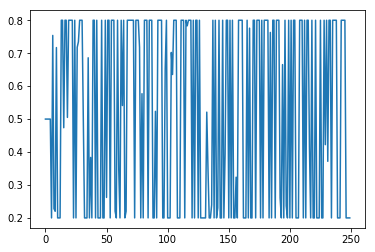

In [4]:
plt.plot(probs) #probabilities of taking action 1

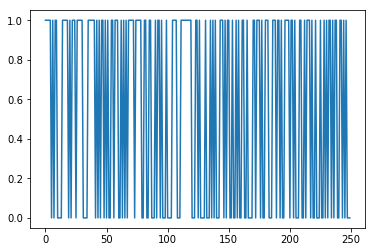

In [5]:
plt.plot(action) #actions actually taken

In [255]:
sm.add_constant(np.concatenate([A,S],3).reshape((N*T*t,(A_dim + S_dim))))

array([[ 1.        ,  0.76669382,  0.03666628, ...,  0.67693888,
         0.62778257,  0.99622739],
       [ 1.        ,  0.2702264 ,  0.13858252, ...,  0.60842382,
         0.41771237,  0.66481278],
       [ 1.        ,  0.44639739,  0.08607395, ...,  0.45849987,
         0.15756941,  0.82462751],
       ..., 
       [ 1.        ,  0.20060242,  0.18065881, ...,  0.52708335,
         0.64167952,  0.65219456],
       [ 1.        ,  0.71920707,  0.57274939, ...,  0.90554077,
         0.8375518 ,  0.30308275],
       [ 1.        ,  0.50387202,  0.00252749, ...,  0.73513361,
         0.05947358,  0.77542993]])

In [117]:
# Generate random user

# New Data 
N_new = 10 # 10 new users to generate
T_new = 90 # 90 days
t_new = t

In [247]:
def generate_new_users(Eta, A, S, N_new, T_new):
    '''
    Generates new random user
    
    
    Inputs:
        Eta: Residuals
        A: Actions
        S: States
        N_new: Int of number of new users to generate from sampling
        T_new: Int of number of days for each new user
    
    Returns:
        Eta_new: Matrix of Etas for sampled users
        A_new: Matrix of associated actions for sampled users
        S_new: Matrix of associated states for sampled users
    *Assumes
    '''
    
    # Obtain original dimensions of data from actions A
    N = A.shape[0]
    T = A.shape[1]
    t = A.shape[2]

    # Component dims of A and S 
    a_dim = A.shape[3]
    s_dim = S.shape[3]

    # Sample random users from original data
    users_to_sample = 3
    sampled_users = np.empty((N_new, users_to_sample)).astype(int)

    # Loop to reset sampling without replacement for each new user
    for i in range(N_new):
        sampled_users[i] = np.random.choice(N, size = users_to_sample, replace = False)

    # Sampled Generated residuals
    Eta_new = np.take(Eta, sampled_users, 0).reshape(N_new, users_to_sample * T, t)[:,:T_new,:]
    # Sampled actions
    A_new = np.take(A, sampled_users, 0).reshape(N_new, users_to_sample * T, t, a_dim)[:,:T_new,:,:]
    # Sampled states
    S_new = np.take(S, sampled_users, 0).reshape(N_new, users_to_sample * T, t, s_dim)[:,:T_new,:,:]

    return Eta_new, A_new, S_new

In [296]:
Eta_new, A_new, S_new = generate_new_users(Eta, A, S, 20, 90)

In [309]:
Eta_new

array([[[-0.11701519,  0.0245651 ,  0.27109892,  0.11506214,  0.00662247],
        [-0.16980941,  0.50319477, -0.00115737, -0.26371352,  0.2750155 ],
        [-0.34165175, -0.46426639, -0.42636807, -0.24445668,  0.00461982],
        ..., 
        [ 0.06228524,  0.38834982, -0.21238059,  0.3620873 ,  0.43817099],
        [ 0.50578215,  0.07694889,  0.33133671, -0.37099858,  0.16045259],
        [ 0.32811682, -0.38441985, -0.47447276,  0.08612402,  0.32644048]],

       [[ 0.21562017,  0.09396243,  0.09305332,  0.49415803,  0.26248361],
        [-0.36186424,  0.0545226 ,  0.44639806, -0.46960225,  0.09143354],
        [ 0.20533233,  0.04381229, -0.03251965,  0.19582517, -0.22423347],
        ..., 
        [-0.31937523, -0.0208543 ,  0.11696839,  0.23291881, -0.10531516],
        [-0.09868048,  0.06636256,  0.08351566,  0.47040062,  0.3464211 ],
        [ 0.25763889,  0.48904781, -0.15942869,  0.46975995,  0.09480972]],

       [[-0.00177765, -0.1777316 , -0.25503932,  0.28620594,  0.0756

In [306]:
def reward_func(Eta, A, S, Theta):
    return Eta + np.concatenate([A, S], A.ndim-1).dot(Theta)

In [1]:
reward_func(Eta_new, A_new, S_new, np.array(range(12)))

NameError: name 'reward_func' is not defined